In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt1000_s1.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,0.001748,0.000804,0.091593,0.260363,0.009699,-0.009958,2.562381,0.116498,0.094974,...,0.124308,0.089357,-0.091056,-0.360373,0.547365,-0.836894,-0.992651,0.121015,-0.408787,0.912630
1,1,0.003096,0.002005,0.100715,0.281456,0.039752,-0.024170,2.423087,0.117974,0.101117,...,0.151305,0.109432,-0.093074,-0.293101,0.658261,-0.752790,-0.992651,0.121015,-0.372919,0.927864
2,2,0.005751,0.002977,0.108506,0.299569,0.050157,-0.030350,2.212466,0.278612,0.076006,...,0.123507,0.004486,-0.005796,-0.541999,0.801097,-0.598534,-0.992651,0.121015,-0.349023,0.937114
3,3,0.009381,0.003976,0.114194,0.320274,0.048161,-0.030308,1.964271,0.317130,0.091839,...,0.164766,-0.010168,0.015523,-0.553410,0.923583,-0.383400,-0.992651,0.121015,-0.330608,0.943768
4,4,0.013264,0.005230,0.117377,0.347508,0.043245,-0.028794,1.715695,0.326006,0.117286,...,0.213182,-0.017814,0.020534,-0.551849,0.989520,-0.144392,-0.992651,0.121015,-0.310446,0.950591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,-0.605753,-0.552241,0.106024,0.828994,0.511844,-2.080121,72.162155,0.302610,0.187850,...,-0.162759,-0.085154,-0.274113,-0.029725,0.094335,-0.995540,-0.002810,-0.999996,0.652193,-0.758053
3996,3996,-0.602252,-0.549945,0.106849,0.817506,0.542571,-2.113044,72.152634,0.282850,0.192420,...,-0.141464,-0.082545,-0.262748,-0.017939,0.103810,-0.994597,-0.002810,-0.999996,0.647112,-0.762395
3997,3997,-0.598961,-0.547643,0.107498,0.805829,0.571758,-2.143606,72.143837,0.266179,0.192338,...,-0.129367,-0.083013,-0.249130,-0.019781,0.112555,-0.993645,-0.002810,-0.999996,0.641194,-0.767379
3998,3998,-0.595891,-0.545302,0.107975,0.793394,0.599357,-2.171792,72.136009,0.246964,0.197264,...,-0.111796,-0.083379,-0.238532,-0.016395,0.120330,-0.992734,-0.002810,-0.999996,0.634655,-0.772796


(4000, 45)

Text(0.5, 0, 'Time (s)')

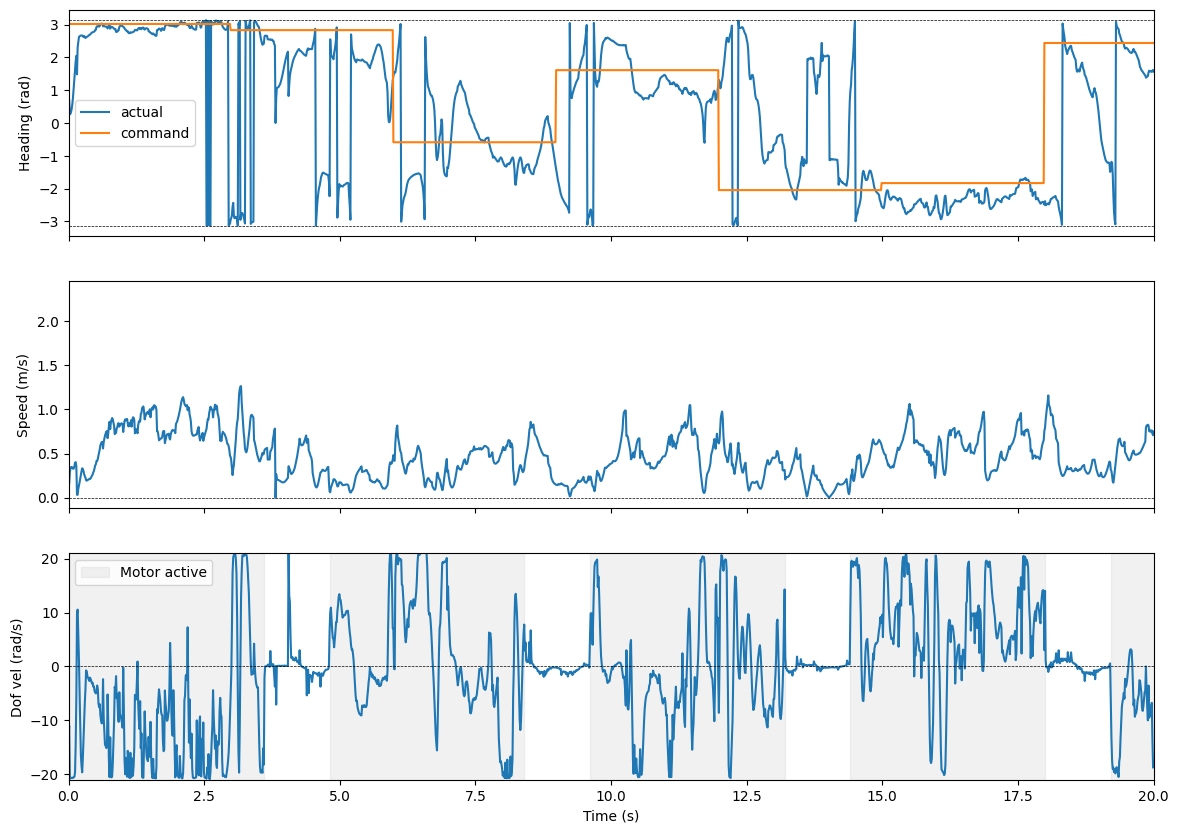

In [3]:
dt = 0.012
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)

des_heading = np.arctan2(df['obs12'], df['obs11']) 

# heading = np.unwrap(heading)
# diff = heading - des_heading
# wrapped_diff = (diff+np.pi)//(2*np.pi)
# # Add the wrapped difference back to angle2
# des_heading = des_heading + wrapped_diff*2*np.pi

fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,10))
axs[0].plot(np.arange(len(df))*dt, heading, label='actual')
axs[0].plot(np.arange(len(df))*dt, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*dt, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*dt, df['obs8']*37.5)
# axs[2].plot(np.arange(len(df))*dt, df['action'])
# axs[2].plot(np.arange(len(df))*dt, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylabel('Dof vel (rad/s)')
axs[2].set_xlim(0,20)

# Create mask for the colored region
episode_length = np.arange(len(df))
mask = ((episode_length % 400) > 0) & ((episode_length % 400) <= 300)

# Plot shaded region
axs[2].fill_between(np.arange(len(df))*dt, -100, 100, 
                    where=mask, 
                    color='lightgray', 
                    alpha=0.3,
                    label='Motor active')
axs[2].set_ylim(-21, 21) # Set reasonable y-limits
axs[2].legend()



axs[-1].set_xlabel('Time (s)')

/tmp/ipykernel_1705284/529650738.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,2000)


(1.1020493850140642, 2000)

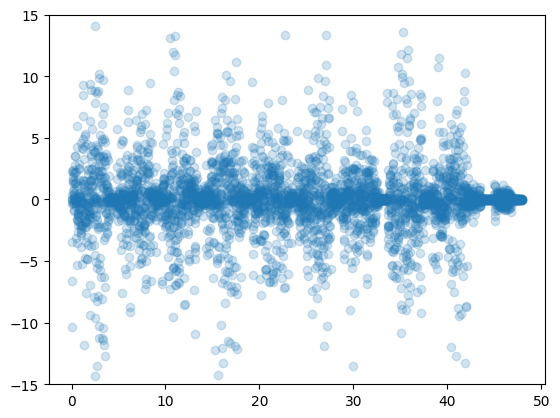

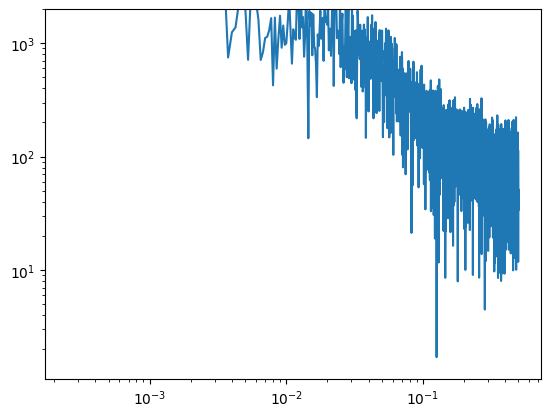

In [6]:
dofvel = df['obs8']*37.5
diffdofvel = np.diff(dofvel,prepend=0)

energy = diffdofvel**2
energy = np.cumsum(energy)

plt.figure()
plt.scatter(np.arange(len(df))*dt, diffdofvel, alpha=0.2)
plt.ylim(-15,15)

#FFT of dofvel
fft = np.fft.fft(dofvel)
frequencies = np.fft.fftfreq(len(dofvel))
plt.figure()
# plt.plot(frequencies, np.abs(fft))
#just the positive frequencies
plt.plot(frequencies[frequencies>0], np.abs(fft[frequencies>0]))
#make loglog
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,2000)

